In [4]:
import os
os.chdir(r"C:\Users\bosea\OneDrive\Desktop\Full stack 2.0")


In [5]:
print(os.getcwd())


C:\Users\bosea\OneDrive\Desktop\Full stack 2.0


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


<h1>KIDNEY DISEASE</h1>

<H3>TRAINING</H3>

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the image size and paths
image_size = (150, 150)
batch_size = 32
train_data_path = r"C:\Users\bosea\OneDrive\Desktop\Full Stack 2.0\Kidney"  # Update this with the path to the extracted "Kidney" folder

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)  # Rescaling pixel values and setting validation split

# Load training and validation datasets
train_generator = datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes (Cyst, Kidney_Stone, Normal, Tumor)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# Save the trained model
model.save('kidney_model.h5')

# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_acc * 100:.2f}%')



Found 48 images belonging to 4 classes.
Found 12 images belonging to 4 classes.


C:\Users\bosea\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\bosea\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.2604 - loss: 1.4396 - val_accuracy: 0.7500 - val_loss: 1.0282
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 987ms/step - accuracy: 0.6840 - loss: 0.9403 - val_accuracy: 1.0000 - val_loss: 0.4790
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.9236 - loss: 0.4646 - val_accuracy: 0.7500 - val_loss: 0.3778
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9514 - loss: 0.2798 - val_accuracy: 1.0000 - val_loss: 0.1035
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 828ms/step - accuracy: 0.9618 - loss: 0.0955 - val_accuracy: 1.0000 - val_loss: 0.0381
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 1.0000 - loss: 0.0544 - val_accuracy: 0.7500 - val_loss: 0.2011
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 864ms/step - accuracy: 1.0000 - loss: 0.0127 - val_accuracy: 1.0000 - val_loss: 0.0458
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 896ms/step - accuracy: 1.0000 - loss: 0.0217 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 9/10
2/2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 1.0000 - loss: 8.1190e-05
Validation accuracy: 100.00%


<H3>GRAPH</H3>

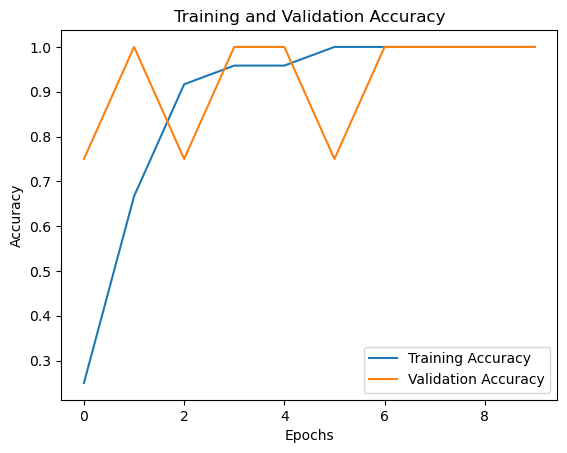

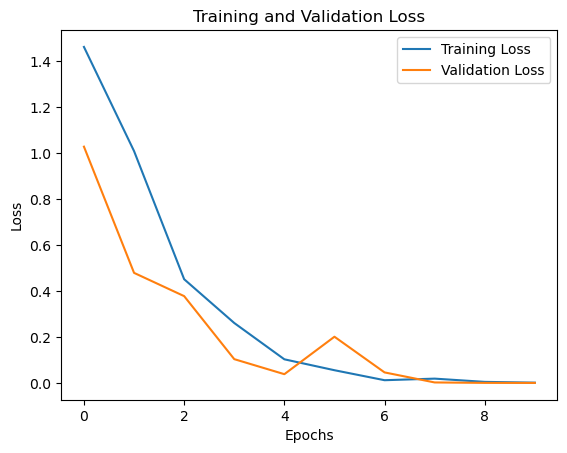

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<H3>TESTING</H3>

In [12]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# Load the trained model
model = load_model('kidney_model.h5')

# Define the path to your test image
test_image_path = r"C:\Users\bosea\OneDrive\Desktop\Full Stack 2.0\Kidney\Cyst\Cyst- (1014).jpg" # Update this with your test image path

# Load and preprocess the test image
img = image.load_img(test_image_path, target_size=(150, 150))  # Resize image to match model input size
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to fit model input
img_array = img_array / 255.0  # Rescale pixel values

# Make a prediction
prediction = model.predict(img_array)

# Define class labels (same as the training labels: Cyst, Kidney_Stone, Normal, Tumor)
class_labels = ['Cyst', 'Kidney_Stone', 'Normal', 'Tumor']

# Get the predicted class index
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Print the predicted class label
predicted_class_label = class_labels[predicted_class_index]
print(f'Predicted class: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Predicted class: Cyst


<H1>LUNGS</H1>

<H3>TRAINING</H3>

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Define the image size and paths
image_size = (150, 150)
batch_size = 32
train_data_path = r"C:\Users\bosea\OneDrive\Desktop\Full Stack 2.0\lung"  # Update this with the path to the extracted "lung" folder

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.2,  # Split training/validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training and validation datasets
train_generator = datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the VGG16 model, excluding the top layers
vgg = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

# Freeze all layers of VGG16 except the last 4 layers for fine-tuning
for layer in vgg.layers[:-4]:
    layer.trainable = False

# Build the model
model = Sequential([
    vgg,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Adjust this based on performance
    callbacks=[early_stopping]
)

# Save the model in .h5 format
model.save('lung_model.h5')

# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_acc * 100:.2f}%')


Found 59 images belonging to 4 classes.
Found 13 images belonging to 4 classes.
Epoch 1/20


C:\Users\bosea\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.2650 - loss: 1.6828 - val_accuracy: 0.3077 - val_loss: 1.4205
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.3641 - loss: 1.4553 - val_accuracy: 0.3077 - val_loss: 1.3519
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 7s/step - accuracy: 0.4292 - loss: 1.2695 - val_accuracy: 0.3846 - val_loss: 1.3657
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 8s/step - accuracy: 0.4726 - loss: 1.2654 - val_accuracy: 0.3846 - val_loss: 1.3151
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 9s/step - accuracy: 0.5252 - loss: 1.0759 - val_accuracy: 0.4615 - val_loss: 1.2996
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 8s/step - accuracy: 0.6054 - loss: 1.0286 - val_accuracy: 0.4615 - val_loss: 1.1813
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 8s/step - accuracy: 0.6151 - loss: 0.8697 - val_accuracy: 0.5385 - val_loss: 1.2134
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 9s/step - accuracy: 0.4882 - loss: 1.1573 - val_accuracy: 0.3077 - val_loss: 1.5016
Epoch 9/20
2/2 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5385 - loss: 1.1802
Validation accuracy: 53.85%


<H3>GRAPH</H3>

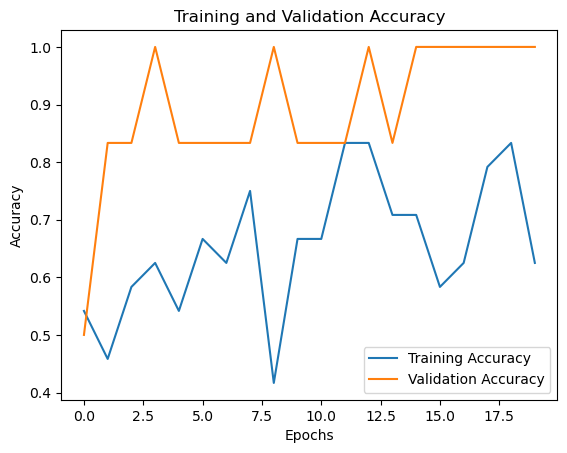

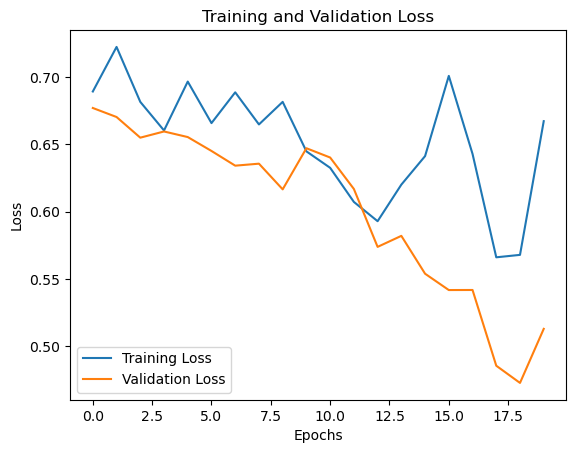

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h3>TESTING</h3>

In [30]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('lung_model.h5')

# Define class labels
class_labels = ['adenocarcinoma', 'large_cell_carcinoma', 'normal', 'squamous_cell_carcinoma']

# Load and preprocess the test image
test_image_path = r"C:\Users\bosea\OneDrive\Desktop\Full Stack 2.0\lung\squamous_cell_carcinoma\000115 (5).png"  # Update this with your test image path
img = image.load_img(test_image_path, target_size=(150, 150))  # Resize image
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions
img_array = img_array / 255.0  # Normalize the pixel values

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Output predicted class
predicted_class_label = class_labels[predicted_class_index]
print(f'Predicted class: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
Predicted class: squamous_cell_carcinoma


<h1>TUBERCULOSIS</h1>

<H3>TRAINING</H3>

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the image size and paths
image_size = (150, 150)
batch_size = 32
train_data_path = r"C:\Users\bosea\OneDrive\Desktop\Full Stack 2.0\Tuberculosis"  # Update this with the path to the extracted "Tuberculosis" folder

# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,  # Use 20% of the data for validation
    rotation_range=20,         # Rotate images randomly
    width_shift_range=0.2,     # Horizontal shift
    height_shift_range=0.2,    # Vertical shift
    shear_range=0.2,           # Shear transformation
    zoom_range=0.2,            # Zoom in/out
    horizontal_flip=True,      # Flip images horizontally
    fill_mode='nearest'        # Fill missing pixels
)

# Load training and validation datasets
train_generator = datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # For binary classification (TB/No_TB)
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification (TB or No_TB)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_tuberculosis_model.keras', save_best_only=True)

# Train the model with early stopping and checkpoint
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Adjust epochs based on model performance
    callbacks=[early_stopping, model_checkpoint]
)

# Save the final model in .keras format
model.save('final_tuberculosis_model.keras')

# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_acc * 100:.2f}%')


Found 24 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


C:\Users\bosea\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.5417 - loss: 0.6894 - val_accuracy: 0.5000 - val_loss: 0.6771
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4583 - loss: 0.7226 - val_accuracy: 0.8333 - val_loss: 0.6704
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5833 - loss: 0.6817 - val_accuracy: 0.8333 - val_loss: 0.6550
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 0.6604 - val_accuracy: 1.0000 - val_loss: 0.6597
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5417 - loss: 0.6968 - val_accuracy: 0.8333 - val_loss: 0.6555
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.6659 - val_accuracy: 0.8333 - val_loss: 0.6451
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 0.6888 - val_accuracy: 0.8333 - val_loss: 0.6342
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.6649 - val_accuracy: 0.8333 - val_loss: 0.6357
Epoch 9/20
1/1 ━

<h3>GRAPH</h3>

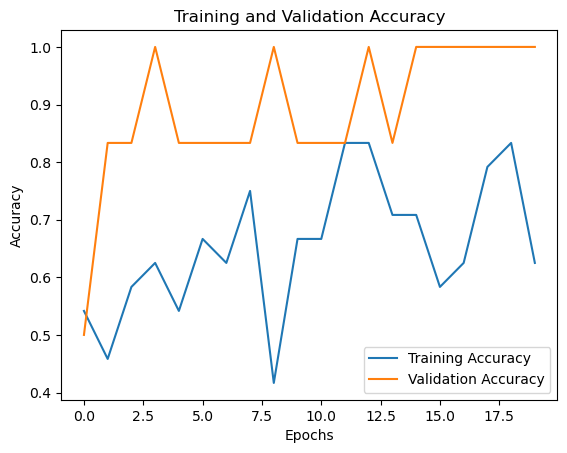

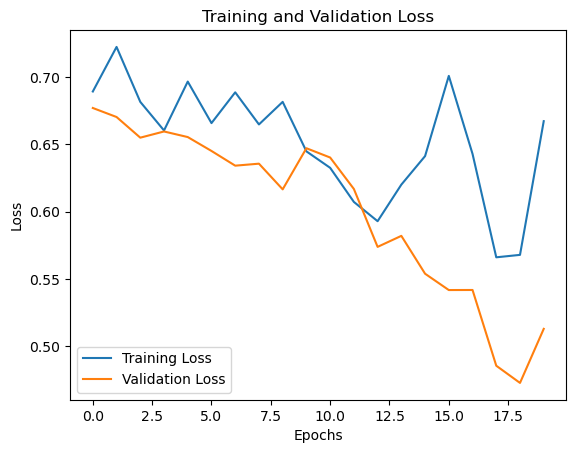

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h3>TESTING</h3>

In [36]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('best_tuberculosis_model.keras')

# Define the path to your test image
test_image_path = r"C:\Users\bosea\OneDrive\Desktop\Full Stack 2.0\Tuberculosis\TB\Tuberculosis-92.png"  # Update this with your test image path

# Load and preprocess the test image
img = image.load_img(test_image_path, target_size=(150, 150))  # Resize image to match model input size
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to fit model input
img_array = img_array / 255.0  # Rescale pixel values

# Make a prediction
prediction = model.predict(img_array)

# Output the predicted class (1 = TB, 0 = No_TB)
if prediction[0] > 0.5:
    print("Predicted class: Tuberculosis")
else:
    print("Predicted class: No Tuberculosis")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Predicted class: Tuberculosis


<h1>BRAIN TUMOR</h1>

<H3>TRAINING</H3>

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define the image size and paths
image_size = (150, 150)
batch_size = 32
train_data_path = r"C:\Users\bosea\OneDrive\Desktop\Full Stack 2.0\brain"  # Update this with the path to the extracted "brain" folder

# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,  # Use 20% of the data for validation
    rotation_range=20,         # Rotate images randomly
    width_shift_range=0.2,     # Horizontal shift
    height_shift_range=0.2,    # Vertical shift
    shear_range=0.2,           # Shear transformation
    zoom_range=0.2,            # Zoom in/out
    horizontal_flip=True,      # Flip images horizontally
    fill_mode='nearest'        # Fill missing pixels
)

# Load training and validation datasets
train_generator = datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # For binary classification (Tumor/No_Tumor)
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Compute class weights to handle imbalanced dataset
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weight_dict = dict(zip(np.unique(train_generator.classes), class_weights))

# Building the CNN model with more complexity
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),  # Added more filters
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),  # Increased the number of neurons
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification (Tumor or No_Tumor)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_brain_model.keras', save_best_only=True)

# Train the model with class weights
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,  # Increase the number of epochs
    class_weight=class_weight_dict,  # Apply class weights
    callbacks=[early_stopping, model_checkpoint]
)

# Save the final model in .keras format
model.save('final_brain_model.keras')

# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_acc * 100:.2f}%')


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


C:\Users\bosea\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


C:\Users\bosea\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4369 - loss: 0.7069 - val_accuracy: 0.4000 - val_loss: 0.7053
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 935ms/step - accuracy: 0.4995 - loss: 0.6873 - val_accuracy: 0.6200 - val_loss: 0.6349
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 980ms/step - accuracy: 0.6270 - loss: 0.6665 - val_accuracy: 0.6000 - val_loss: 0.6451
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 993ms/step - accuracy: 0.6148 - loss: 0.6626 - val_accuracy: 0.5800 - val_loss: 0.6666
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5851 - loss: 0.6606 - val_accuracy: 0.7600 - val_loss: 0.6312
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 943ms/step - accuracy: 0.4599 - loss: 0.6814 - val_accuracy: 0.7000 - val_loss: 0.6219
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 947ms/step - accuracy: 0.6566 - loss: 0.6510 - val_accuracy: 0.7200 - val_loss: 0.5782
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 989ms/step - accuracy: 0.5875 - loss: 0.6742 - val_accuracy: 0.7200 - val_loss: 0.6073
Epo

<H3>GRAPH</H3>

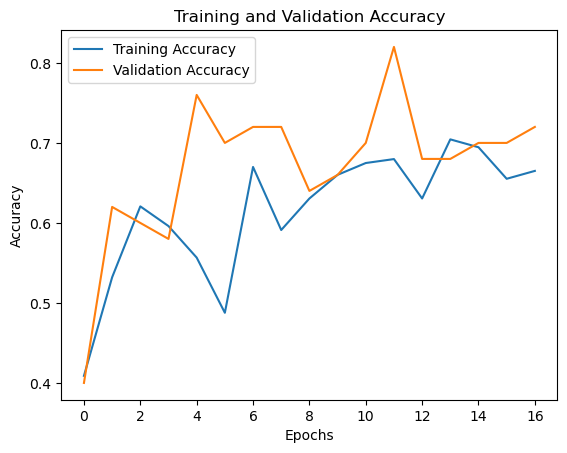

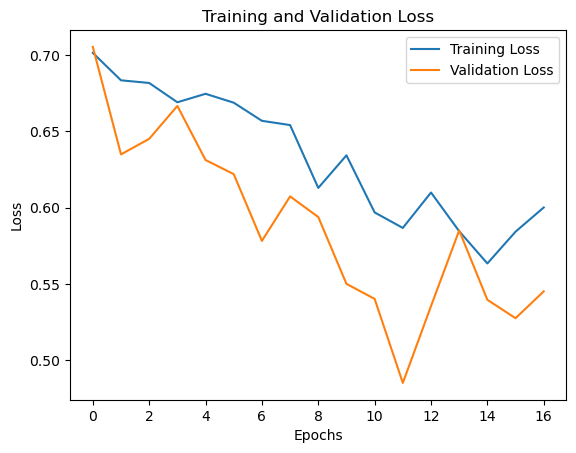

In [44]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<H3>TESTING</H3>

In [46]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('best_brain_model.keras')

# Define the path to your test image
test_image_path = r"C:\Users\bosea\OneDrive\Desktop\Full Stack 2.0\brain\No_Tumor\19 no.jpg" # Update this with your test image path

# Load and preprocess the test image
img = image.load_img(test_image_path, target_size=(150, 150))  # Resize image to match model input size
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to fit model input
img_array = img_array / 255.0  # Rescale pixel values

# Make a prediction
prediction = model.predict(img_array)

# Output the predicted class (1 = Tumor, 0 = No_Tumor)
if prediction[0] > 0.5:
    print("Predicted class: Tumor")
else:
    print("Predicted class: No_Tumor")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Predicted class: No_Tumor
